
Accuracy: 94.40%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       742
           1       0.88      0.93      0.90       293

    accuracy                           0.94      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.95      0.94      0.94      1035



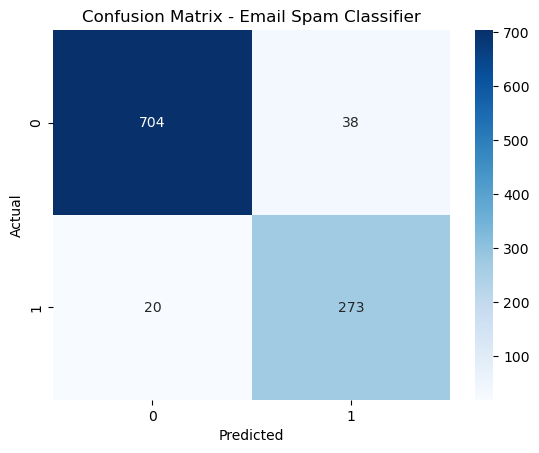


Email: Congratulations! You've won a free iPhone. Click here to claim your prize!
Prediction: 🚫 SPAM

Email: Hey Ishwar, please review the project report by tomorrow morning.
Prediction: ✅ HAM


In [2]:
#%% Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import re, string

#%% Load Dataset
df = pd.read_csv("spam_ham_dataset.csv")
df.rename(columns={'text': 'message', 'label': 'category'}, inplace=True)

#%% Basic Text Cleaning
def clean_text(text):
    text = re.sub(r'\d+', '', str(text).lower())                 # numbers remove
    text = text.translate(str.maketrans('', '', string.punctuation))  # punctuation remove
    return text

df['clean_text'] = df['message'].apply(clean_text)
df['label_num'] = df['category'].map({'ham': 0, 'spam': 1})

#%% Split Data
x_train, x_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label_num'], test_size=0.2, random_state=42
)

#%% TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

#%% Train Model
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

#%% Evaluate Model
y_pred = model.predict(x_test_tfidf)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#%% Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Email Spam Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#%% Test Custom Emails
sample_emails = [
    "Congratulations! You've won a free iPhone. Click here to claim your prize!",
    "Hey Ishwar, please review the project report by tomorrow morning.",
]

for email in sample_emails:
    cleaned = clean_text(email)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    print(f"\nEmail: {email}\nPrediction: {'🚫 SPAM' if pred == 1 else '✅ HAM'}")
